In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../../../data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df = data

In [4]:
df = df.drop_duplicates()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.date = df["date"].map(lambda x: x.split("/")[0])
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df['date'] = df['date'].map(lambda x: int(x))

In [7]:
df['bed_bath'] = df['bedrooms']/df['bathrooms']

In [8]:
df['bath_bed'] = df['bathrooms']/df['bedrooms']

In [9]:
df['bed_bath'] = df['bed_bath'].map(lambda x: float(x))

In [10]:
df['bath_bed'] = df['bath_bed'].map(lambda x: float(x))

In [11]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [12]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
bath_bed         0.281227
waterfront       0.264306
floors           0.256804
bed_bath         0.249948
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
date             0.009928
Name: price, dtype: float64

In [13]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bath_bed         0.409125
bed_bath         0.403333
bedrooms         0.356563
view             0.249727
long             0.200341
zipcode          0.185771
condition        0.146896
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.016669
date             0.008989
id               0.008188
Name: grade, dtype: float64

In [14]:
df.grade.mean()

7.657915451220076

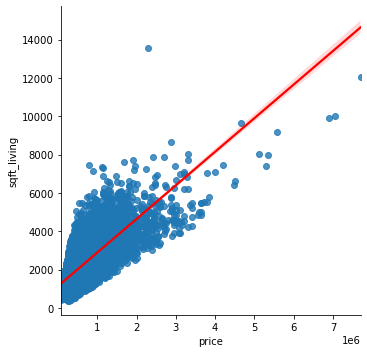

In [15]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

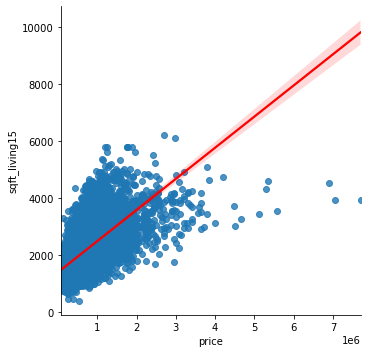

In [16]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [17]:
df.price.median()

450000.0

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2140.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:17:39   Log-Likelihood:            -2.4111e+05
No. Observations:               17704   AIC:                         4.823e+05
Df Residuals:                   17683   BIC:                         4.824e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.976e+06    3.2e+06      2.178      0.029    6.99e+05    1.33e+07
date          -2924.5344    480.154     -6.091      0.000   -3865.683   -1983.386
bedrooms      -1.083e+05   4636.686    -23.351      0.000   -1.17e+05   -9.92e+04
bathrooms      1.701e+05   8083.594     21.042      0.000    1.54e+05    1.86e+05
sqft_living     147.6578      4.775     30.921      0.000     138.298     157.018
sqft_lot          0.0728      0.052      1.412      0.158      -0.028       0.174
floors         5920.4893   3969.279      1.492      0.136   -1859.688    1.37e+04
waterfront     5.989e+05   1.98e+04     30.175      0.000     5.6e+05    6.38e+05
view           5.326e+04   2330.980     22.847      0.000    4.87e+04    5.78e+04
condition      3.036e+04   2570.845     11.808      0.000    2.53e+04    3.54e+04
grade          9.322e+04   2373.941     39.267      0.000    8.86e+04    9.79e+04
sqft_above       25.7335      4.788      5.374      0.000      16.348      35.119
yr_built      -2475.8530     79.724    -31.055      0.000   -2632.120   -2319.586
yr_renovated     26.7688      4.007      6.680      0.000      18.915      34.623
zipcode        -592.0382     35.957    -16.465      0.000    -662.518    -521.558
lat            6.074e+05   1.17e+04     51.852      0.000    5.84e+05     6.3e+05
long          -2.148e+05   1.43e+04    -14.972      0.000   -2.43e+05   -1.87e+05
sqft_living15    26.5923      3.804      6.991      0.000      19.137      34.048
sqft_lot15       -0.3250      0.079     -4.120      0.000      -0.480      -0.170
bed_bath       1.145e+05   5744.559     19.938      0.000    1.03e+05    1.26e+05
bath_bed      -7.501e+04   1.99e+04     -3.760      0.000   -1.14e+05   -3.59e+04
==============================================================================
Omnibus:                    14355.291   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1281916.789
Skew:                           3.330   Prob(JB):                         0.00
Kurtosis:                      44.152   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split data low < 300,000 // mid 300,000 - 650,000 // high >= 650,000
#### because the median is 450,000 and the mean is 540,000 in order to get a cleaner slice of the data this is why i chose these numbers

In [19]:
df_low_price = df.loc[df['price']< 300000]
df_low_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
0,7129300520,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.000000,0.333333
2,5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2.000000,0.500000
6,1321400060,6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,1.333333,0.750000
7,2008000270,1,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2.000000,0.500000
8,2414600126,4,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,1760650820,4,290000.0,3,2.25,1610,3764,2.0,0.0,0.0,...,0.0,2012,0.0,98042,47.3589,-122.083,1610,3825,1.333333,0.750000
21534,880000205,7,249000.0,3,2.00,1260,1125,2.0,0.0,0.0,...,450.0,2011,0.0,98106,47.5262,-122.361,1260,1172,1.500000,0.666667
21556,6056111067,7,230000.0,3,1.75,1140,1201,2.0,0.0,0.0,...,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552,1.714286,0.583333
21569,3832050760,8,270000.0,3,2.50,1870,5000,2.0,0.0,0.0,...,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399,1.200000,0.833333


In [20]:
predictors_low = df_low_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_low= '+'.join(predictors_low)
f = 'price ~' + predict_low
model = ols(formula=f, data=df_low_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     94.06
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          7.49e-310
Time:                        09:17:39   Log-Likelihood:                -43091.
No. Observations:                3625   AIC:                         8.622e+04
Df Residuals:                    3604   BIC:                         8.635e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.423e+06   1.09e+06     -4.054      0.000   -6.56e+06   -2.28e+06
date            -49.2584    182.216     -0.270      0.787    -406.516     307.999
bedrooms      -3767.7055   2676.364     -1.408      0.159   -9015.045    1479.634
bathrooms      1.459e+04   4640.184      3.143      0.002    5488.523    2.37e+04
sqft_living      25.4303      2.816      9.029      0.000      19.908      30.952
sqft_lot          0.0002      0.025      0.009      0.992      -0.050       0.050
floors         3370.5391   1914.359      1.761      0.078    -382.797    7123.875
waterfront     5.873e+04   2.62e+04      2.245      0.025    7432.778     1.1e+05
view           9734.5286   2133.360      4.563      0.000    5551.816    1.39e+04
condition      1.048e+04    953.966     10.986      0.000    8609.572    1.24e+04
grade          9376.0446   1138.650      8.234      0.000    7143.581    1.16e+04
sqft_above        1.1434      2.817      0.406      0.685      -4.379       6.666
yr_built        150.4258     37.874      3.972      0.000      76.170     224.682
yr_renovated      5.5714      1.904      2.925      0.003       1.837       9.305
zipcode          -3.7729     11.833     -0.319      0.750     -26.972      19.427
lat            1.238e+05   5984.622     20.689      0.000    1.12e+05    1.36e+05
long            1.06e+04   5080.054      2.088      0.037     644.702    2.06e+04
sqft_living15    13.1161      2.048      6.403      0.000       9.100      17.132
sqft_lot15        0.0197      0.042      0.472      0.637      -0.062       0.102
bed_bath      -2240.1120   2654.634     -0.844      0.399   -7444.846    2964.622
bath_bed      -1.608e+04   8434.815     -1.906      0.057   -3.26e+04     460.731
==============================================================================
Omnibus:                      191.811   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.113
Skew:                          -0.561   Prob(JB):                     4.82e-50
Kurtosis:                       3.493   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df_low_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.415816
bathrooms        0.395638
grade            0.373770
sqft_above       0.342194
sqft_living15    0.321396
yr_built         0.275575
floors           0.237730
bed_bath         0.234087
bedrooms         0.224481
bath_bed         0.213149
lat              0.081267
view             0.066596
long             0.056530
zipcode          0.052562
id               0.039742
condition        0.033300
waterfront       0.023752
date             0.014773
yr_renovated     0.006864
sqft_lot15       0.004650
sqft_lot         0.004512
Name: price, dtype: float64

In [22]:
df_middle_price = df.loc[(300000 <= df['price']) & (df['price'] < 650000)]
df_middle_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
1,6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.333333,0.750000
3,2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.333333,0.750000
4,1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.500000,0.666667
9,3793500160,3,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,1.200000,0.833333
11,9212900260,5,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,2.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,1.200000,0.833333
21593,6600060120,2,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1.600000,0.625000
21594,1523300141,6,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.666667,0.375000
21595,291310100,1,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1.200000,0.833333


In [23]:
predictors_middle = df_middle_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_middle= '+'.join(predictors_middle)
f = 'price ~' + predict_middle
model = ols(formula=f, data=df_middle_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     287.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:17:39   Log-Likelihood:            -1.2307e+05
No. Observations:                9717   AIC:                         2.462e+05
Df Residuals:                    9696   BIC:                         2.463e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.287e+06   1.81e+06     -2.364      0.018   -7.84e+06   -7.32e+05
date          -1562.6645    250.987     -6.226      0.000   -2054.652   -1070.677
bedrooms       -604.3431   2636.085     -0.229      0.819   -5771.620    4562.934
bathrooms      5873.0850   4708.528      1.247      0.212   -3356.613    1.51e+04
sqft_living      33.8453      2.763     12.249      0.000      28.429      39.262
sqft_lot          0.1181      0.034      3.498      0.000       0.052       0.184
floors          2.21e+04   2089.829     10.576      0.000     1.8e+04    2.62e+04
waterfront     6.751e+04   1.89e+04      3.565      0.000    3.04e+04    1.05e+05
view           1.173e+04   1559.876      7.519      0.000    8670.337    1.48e+04
condition      8938.4898   1385.022      6.454      0.000    6223.557    1.17e+04
grade           4.08e+04   1374.834     29.677      0.000    3.81e+04    4.35e+04
sqft_above       -8.5457      2.738     -3.121      0.002     -13.913      -3.178
yr_built      -1190.2544     43.953    -27.080      0.000   -1276.411   -1104.098
yr_renovated      0.0816      2.382      0.034      0.973      -4.587       4.751
zipcode         -44.7465     20.856     -2.146      0.032     -85.628      -3.865
lat            3.151e+05   6496.349     48.498      0.000    3.02e+05    3.28e+05
long           3.284e+04   7548.886      4.350      0.000     1.8e+04    4.76e+04
sqft_living15    27.8442      2.338     11.912      0.000      23.262      32.426
sqft_lot15        0.0895      0.045      1.989      0.047       0.001       0.178
bed_bath        -38.2498   3414.645     -0.011      0.991   -6731.667    6655.168
bath_bed       3.275e+04   9772.847      3.351      0.001    1.36e+04    5.19e+04
==============================================================================
Omnibus:                      122.342   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.549
Skew:                           0.236   Prob(JB):                     4.92e-26
Kurtosis:                       2.745   Cond. No.                     2.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df_middle_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
grade            0.322745
sqft_living      0.284849
lat              0.271453
sqft_living15    0.260651
sqft_above       0.201190
bathrooms        0.187177
bedrooms         0.112780
bed_bath         0.098861
bath_bed         0.096704
view             0.095708
floors           0.080637
sqft_lot         0.059713
sqft_lot15       0.055117
condition        0.042578
id               0.041142
yr_built         0.040886
yr_renovated     0.037600
long             0.035189
zipcode          0.023138
date             0.017663
waterfront       0.014796
Name: price, dtype: float64

In [25]:
df_higher_price = df.loc[df['price']>= 650000]
df_higher_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,bath_bed
5,7237550310,5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.888889,1.125000
10,1736800520,4,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,1.200000,0.833333
15,9297300055,1,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,1.333333,0.750000
21,2524049179,8,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,1.090909,0.916667
26,1794500383,6,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,1.714286,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,8,679950.0,5,2.75,3600,9437,2.0,0.0,0.0,...,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421,1.818182,0.550000
21581,191100405,4,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,?,2007,NaN,98040,47.5653,-122.223,2290,10125,1.230769,0.812500
21583,7202300110,9,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814,1.333333,0.750000
21584,249000205,10,1540000.0,5,3.75,4470,8088,2.0,0.0,0.0,...,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964,1.333333,0.750000


In [26]:
predictors_higher = df_higher_price.drop(['id', 'sqft_basement', 'price'], axis = 1)
predict_higher= '+'.join(predictors_higher)
f = 'price ~' + predict_higher
model = ols(formula=f, data=df_higher_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     362.4
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:17:40   Log-Likelihood:                -61109.
No. Observations:                4362   AIC:                         1.223e+05
Df Residuals:                    4341   BIC:                         1.224e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.925e+07   1.05e+07      3.741      0.000    1.87e+07    5.98e+07
date          -4308.5229   1471.884     -2.927      0.003   -7194.168   -1422.878
bedrooms      -1.581e+05   1.55e+04    -10.209      0.000   -1.88e+05   -1.28e+05
bathrooms      2.454e+05   2.33e+04     10.540      0.000       2e+05    2.91e+05
sqft_living     169.4555     10.807     15.680      0.000     148.268     190.643
sqft_lot          0.1914      0.110      1.733      0.083      -0.025       0.408
floors        -4.459e+04   1.19e+04     -3.735      0.000    -6.8e+04   -2.12e+04
waterfront     6.625e+05   3.31e+04     20.019      0.000    5.98e+05    7.27e+05
view            3.91e+04   4574.014      8.547      0.000    3.01e+04    4.81e+04
condition      3.403e+04   8055.421      4.225      0.000    1.82e+04    4.98e+04
grade          9.462e+04   6196.338     15.270      0.000    8.25e+04    1.07e+05
sqft_above       73.6444     11.301      6.517      0.000      51.489      95.800
yr_built      -2463.3466    224.803    -10.958      0.000   -2904.076   -2022.617
yr_renovated     32.0453      9.333      3.433      0.001      13.747      50.343
zipcode       -2256.3943    115.846    -19.478      0.000   -2483.511   -2029.278
lat            6.604e+05   6.32e+04     10.441      0.000    5.36e+05    7.84e+05
long          -1.265e+06   5.36e+04    -23.624      0.000   -1.37e+06   -1.16e+06
sqft_living15    31.5501      8.734      3.612      0.000      14.427      48.674
sqft_lot15       -0.6021      0.188     -3.199      0.001      -0.971      -0.233
bed_bath       1.905e+05   2.14e+04      8.885      0.000    1.48e+05    2.32e+05
bath_bed      -2.463e+05   7.34e+04     -3.355      0.001    -3.9e+05   -1.02e+05
==============================================================================
Omnibus:                     2164.071   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42849.170
Skew:                           1.902   Prob(JB):                         0.00
Kurtosis:                      17.876   Cond. No.                     2.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df_higher_price.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.606855
grade            0.507928
sqft_above       0.466493
bathrooms        0.465078
sqft_living15    0.373587
view             0.337407
waterfront       0.306229
bath_bed         0.271814
bed_bath         0.218470
bedrooms         0.202216
floors           0.126413
yr_renovated     0.106662
zipcode          0.083262
long             0.082348
id               0.051263
sqft_lot15       0.038203
sqft_lot         0.032130
yr_built         0.031285
lat              0.010257
condition        0.004123
date             0.002982
Name: price, dtype: float64